In [3]:
import cv2
import pytesseract
from pytesseract import image_to_string
from PIL import Image
import matplotlib.pyplot as plt
# set tesseract cmd path to tesseract ocr execute file path
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'

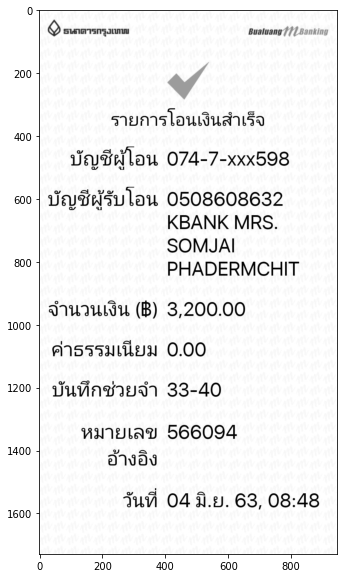

In [4]:
image = cv2.imread("images\\40.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.figure(figsize = (10,10))
plt.imshow(image,cmap='gray')

In [5]:
recog_str = image_to_string(image, lang='tha+eng', config='--psm 6')

In [6]:
print(recog_str)

@ ธนชาเตารทรุงเทพเข                                      8แลเพลทย    4     1
รายการโอนเงินสําเร็จ
บัญชีผู้โอน 074-7->๐๐๕๐98
บัญชีผู้รับโอน 0508608632
KBANK MRS.
SOMUAI
PHADERMCHIT
จํานวนเงิน (8) 3,200.00
ค่าธรรมเนียม 0.00
บันทึกช่วยจํา 33-40
หมายเลข 566094
อ้างอิง
วันที่ 04 มิ.ย. 63, 08:48



In [7]:
recog_str = image_to_string(image, lang='tha+eng', config='--psm 3')

In [8]:
print(recog_str)

(ธนาตารกรุงเทพย        ๒แลเแลทย7 778ลก

รายการโอนเงินสําเร็จ
บัญชีผู้โอน 074-7-๓๐๐598

บัญชีผู้รับโอน 0508608632
KBANK MRS.
SOMIAI
PHADERMCHIT

จํานวนเงิน (8) 3,200.00
ค่าธรรมเนียม 0.00
บันทึกช่วยจํา 33-40
หมายเลข 566094
อ้างอิง

วันที่ 04 มิ.ย. 63, 08:48



In [9]:
image = cv2.imread("images\\1.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [10]:
recog_str = image_to_string(image, lang='eng', config='--psm 3')
print(recog_str)

246—0—xxx909
0508608632 KBANK



In [11]:
from pytesseract import Output
image = cv2.imread("images/slips/3 24.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
d = pytesseract.image_to_data(image, output_type=Output.DICT)
n_boxes = len(d['level'])
print(image.shape)
image2 = image.copy()
for i in range(n_boxes-1):
    (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])
    cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
    subimg = image2[y-2:y+h+2, x-2:x+w+2]
    if h<image2.shape[0]/20:
        sub_str = image_to_string(subimg, lang='tha+eng', config='--psm 6')
        print(sub_str)


(1334, 750)
Krungthai

กรุงไทย

กรุงไทย

โอนเงินสําเร็จ

โอนเงินสําเร็จ

โอนเงินสําเร็จ

โอนเงินสําเร็จ

เลขอ้างอิง 018714847582

เลขอ้างอิง 018714847582

เลขอ้างอิง 018714847582

เลขอ้างอิง

018714847582

สแกนตรวจสอบ

สแกนตรวจสอบ

สแกนตรวจสอบ

สแกนตรวจสอบ

อาก                      นายรังสฤษดี์ ปีติทศพร

จาก

นายรังสฤษดี์

บปติทศพร

C                   กรุงไทย XXX—X—XX476—3

C

กรุงไทย

XXX—X—XX476—3

ไปยัง                         นาง สมใจ ผเดิมชิต

ไปยัง

นาง

สมใจ

ผเลดิมชิต

๐                  กสิกรไทย %00->%-%>%863-2


กฮิกรไทย

XXX—X—XX863—2

จํานวนเงิน                     6,400.00 uin

จํานวนเงิน

6,400.00

บาท

ค่าธรรมเนียม                         0.00 บาท

ค่าธรรมเนียม

0.00

บาท

วันที่ทํารายการ             05 n.A. 2563 14:23 u.

วันที่ทํารายการ

05

N.A.

2563

14:23

U.

วันที่รายการมีผล                   05 ก.ค. 2563

วันที่รายการมีผล                   05 ก.ค. 2563

วันที่รายการมีผล                   05 ก.ค. 2563

วันที่ราย

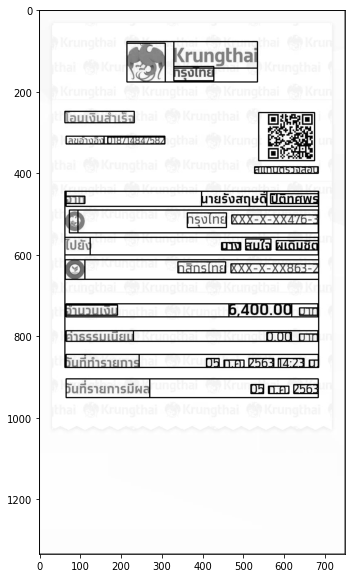

In [12]:

plt.figure(figsize = (10,10))
plt.imshow(image,cmap='gray')

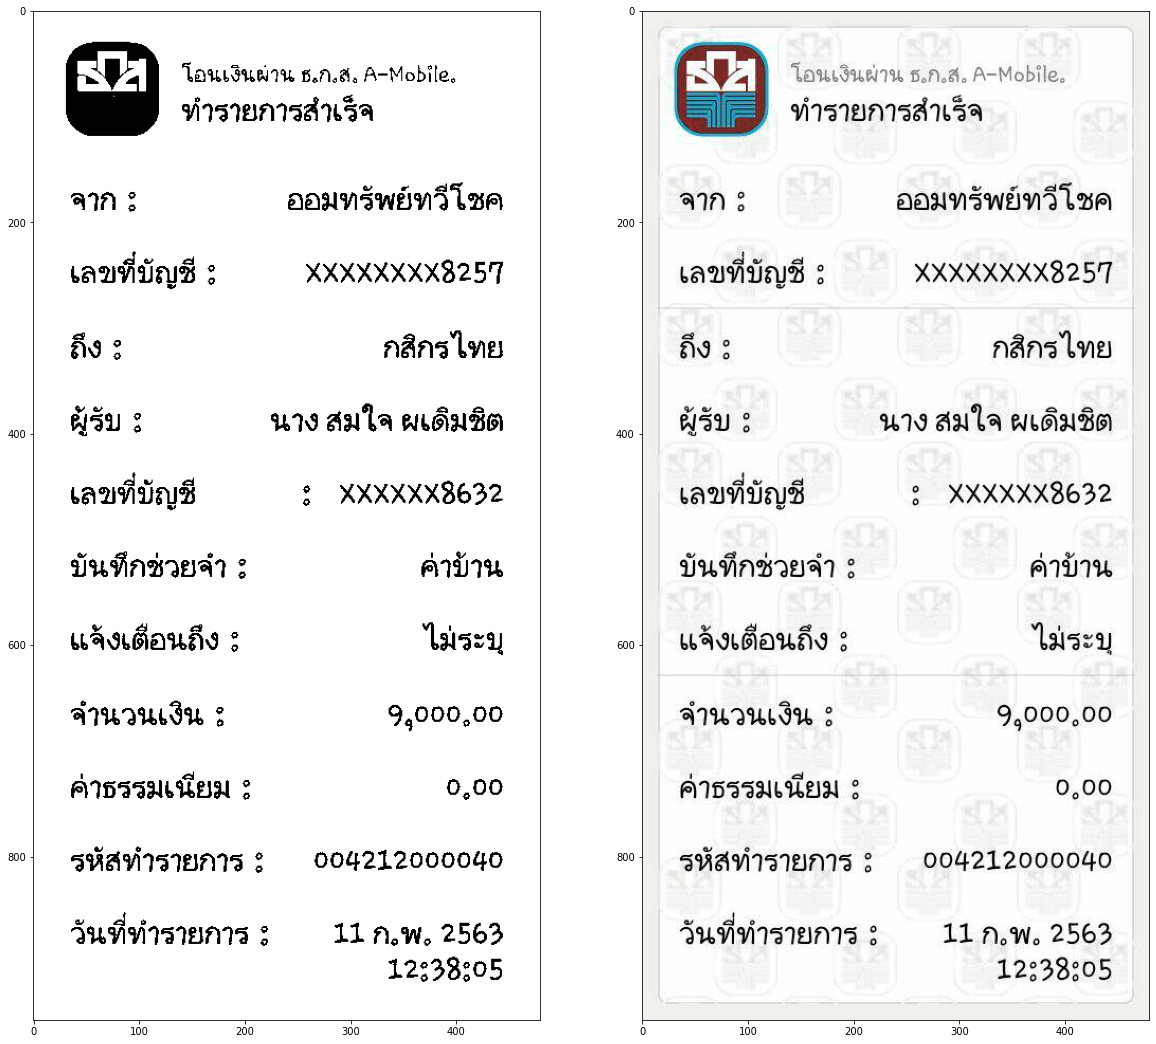

In [13]:
import easyocr
import cv2
image = cv2.imread('images/Slip2/174.jpg')
image2 = image.copy()
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
a, threshold = cv2.threshold(image, 180, 255, cv2.THRESH_BINARY)
plt.figure(figsize = (20,20))
plt.subplot(121)
plt.imshow(threshold,cmap='gray')
plt.subplot(122)
plt.imshow(image2)

In [14]:
reader = easyocr.Reader(['th','en'], gpu=False) # need to run only once to load model into memory
result = reader.readtext(image2, width_ths=0.7)
print(result)

Using CPU. Note: This module is much faster with a GPU.


[([[137, 45], [404, 45], [404, 75], [137, 75]], 'โอนเงินผ่าน ธ.ก.ส. a-mobile.', 0.029429160058498383), ([[134, 76], [326, 76], [326, 112], [134, 112]], 'ทำรายการสำเร็จ', 0.331006795167923), ([[236, 157], [449, 157], [449, 200], [236, 200]], 'ออมทรัพย์ทวีโชค', 0.16110748052597046), ([[34, 168], [82, 168], [82, 192], [34, 192]], 'จาก', 0.4129432737827301), ([[30, 225], [161, 225], [161, 267], [30, 267]], 'เลขที่บัญชี', 0.27544450759887695), ([[254, 232], [450, 232], [450, 264], [254, 264]], 'xxxxxxxx8257', 0.27396318316459656), ([[327, 300], [452, 300], [452, 338], [327, 338]], 'กสิกรไทย', 0.10461728274822235), ([[32, 302], [70, 302], [70, 334], [32, 334]], 'ถึง', 0.6709370613098145), ([[221, 369], [450, 369], [450, 405], [221, 405]], 'นาง สมใจ ผเดิมชิต', 0.01147332414984703), ([[31, 371], [91, 371], [91, 407], [31, 407]], ' ผู้รับ', 0.05140785872936249), ([[30, 433], [159, 433], [159, 477], [30, 477]], 'เลขที่บัญชี', 0.2136615365743637), ([[286, 442], [450, 442], [450, 472], [286, 472]]

25
โอนเงินผ่าน ธ.ก.ส. a-mobile.
ทำรายการสำเร็จ
ออมทรัพย์ทวีโชค
จาก
เลขที่บัญชี
xxxxxxxx8257
กสิกรไทย
ถึง
นาง สมใจ ผเดิมชิต
 ผู้รับ
เลขที่บัญชี
xxxxxx8632
บันทึกช่วยจำ
 ค่าข้าน
ไม่ระบุ
แจ้งเตือนถึง
 จำนวนเงิน
9,000,00
ค่าธรรมเนียม
o.dd
 รหัสทำรายการ
004212000040
วันที่ทำรายการ
11 ก.พ. 2563
12:38:05


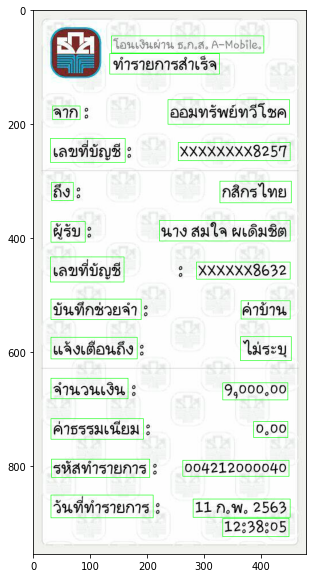

In [15]:
print(len(result))
image3 = image2.copy()
font = cv2.FONT_HERSHEY_SIMPLEX
for entry in result:
    top_left, top_right, bottom_right, bottom_left = entry[0]
    print(entry[1])
    cv2.rectangle(image3, (int(top_left[0]), int(top_left[1])), (int(bottom_right[0]), int(bottom_right[1])), (0, 255, 0), 1)
    

#     sub_str = image_to_string(subimg, lang='tha+eng', config='--psm 6')
#     print(sub_str)
#     cv2.putText(image2, entry[1], (top_left[0], top_left[1]), font, 1, (0, 0, 0), 1, cv2.LINE_AA)
plt.figure(figsize = (10,10))
plt.imshow(image3)

In [16]:
import re
# find candidate by coordinate
def find_candidate(result, entry, regex):
    print('called')
    candidate = ''
    exists = False
    top_left, top_right, bottom_right, bottom_left = entry[0]
    height = bottom_left[1] - top_left[1]
    for entry1 in result:
        top_left1, top_right1, bottom_right1, bottom_left1 = entry1[0]
        # y coordinate should be same or under of label
        if (abs(top_left1[1] - top_left[1]) < height and abs(bottom_left1[1] - bottom_left[1]) < height):
            matched = re.search(amount_regex, entry1[1])
            if matched:
                exists = True
                candidate = matched.group(0)
    
    if exists:
        return candidate
    for entry1 in result:
        top_left1, top_right1, bottom_right1, bottom_left1 = entry1[0]
        # y coordinate should be same or under of label
        if (top_left1[1] - bottom_left[1] < 3 * height and top_left1[1] - top_left[1] > 0):
            matched = re.search(amount_regex, entry1[1])
            if matched:
                candidate = matched.group(0)
    return candidate


amount = ''
fee = ''
amount_regex = '[0-9od][0-9,.od]+'
for entry in result:
    e_text = entry[1]
    # find amount
    if 'จำนวน' in e_text:
        amount = find_candidate(result, entry, amount_regex)
        amount = amount.replace('o', '0').replace('d', '0')
    if 'ค่าธรรมเนียม' in e_text:
        fee = find_candidate(result, entry, amount_regex)
        fee = fee.replace('o', '0').replace('d', '0')        
# find date
transaction_date = ''
match_string = '[0-9]{1,2}\s*.\..\.\s*(([0-9]{4})|([0-9]{2}))'
for entry in result:
    e_text = entry[1]
    try:
        transaction_date = re.search(match_string, e_text).group(0)
        break
    except AttributeError:
        transaction_date = ''
# find time
transaction_time = ''
match_string = '[0-9]{2}\s*\:\s*[0-9]{2}(\s*\:\s*[0-9]{2})?'
for entry in result:
    e_text = entry[1]
    try:
        transaction_time = re.search(match_string, e_text).group(0)
        break
    except AttributeError:
        transaction_time = ''
# find bank name
bank_name = ''
bank_name_list = [
    {
        'en_name': 'Siam Commercial Bank', 
        'th_name' : 'ธนาคารกรุงเทพ',
        'synonyms': ['scb']
    }, 
    {
        'en_name': 'Bangkok Bank',
        'th_name': 'ธนาคารกรุงเทพ',
        'synonyms': ['bualuang', 'ธนาคารกรุงเทพ', 'bangkok bank']
    }, 
    {
        'en_name': 'Krung Thai Bank',
        'th_name': 'ธนาคารกรุงไทย',
        'synonyms': ['krungthai', 'กรุงไทย']
    },
    {
        'en_name': 'Kasikorn Bank',
        'th_name': 'ธนาคารกสิกรไทย',
        'synonyms': ['ธ.กสิกรไทย']
    },
    {
        'en_name': 'Thanachart Bank',
        'th_name': 'ธนาคารธนชาต',
        'synonyms': ['thanachart bank', 'ธนาคารธนชาต']
    },
    {
        'en_name': 'Krungsri Bank',
        'th_name': 'กรุงศรี',
        'synonyms': ['krungsri', 'กรุงศรี']
    }
    
]
for entry in result:
    for bank_info in bank_name_list:
        bank_synonyms = bank_info['synonyms']
#         print(bank_synonyms)
        for bank_synonym in bank_synonyms:
            e_text = entry[1]
            if  bank_synonym in e_text:
                bank_name = bank_info['en_name']
                break
        
print('amount :', amount)
print('fee :', fee)
print('transaction_date : ', transaction_date)
print('transaction_time : ', transaction_time)
print('bank name :', bank_name)

called
called
amount : 9,000,00
fee : 0.00
transaction_date :  11 ก.พ. 2563
transaction_time :  12:38:05
bank name : 
